In [ ]:
!conda create -n m18k python=3.10 -y
!conda activate m18k

In [1]:
import matplotlib.pyplot as plt
import torchvision
import cv2
import numpy as np
from PIL import Image
import random

from M18K.Data.Dataset import M18KDataset

ds = M18KDataset(root="train",transforms=None,train=True, depth=True)

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


In [2]:
image, label = ds[random.sample(range(len(ds)),1)[0]]
print("Image: ", image.shape)
print("Label keys:")
for k,v in label.items():
    
    if k in ["boxes","masks","labels","area","iscrowd","depth","img_org"]:
        print("\t",k, v.shape)
    else:
        print("\t", k, v)

Image:  torch.Size([4, 720, 1280])
Label keys:
	 boxes torch.Size([117, 4])
	 masks torch.Size([117, 720, 1280])
	 labels torch.Size([117])
	 image_id 169
	 area torch.Size([117])
	 iscrowd torch.Size([117])
	 image_name images/Dataset3_900_png_jpg.rf.2356bc476f4237db860e0181637faf78.jpg
	 depth torch.Size([720, 1280])
	 img_org torch.Size([3, 720, 1280])


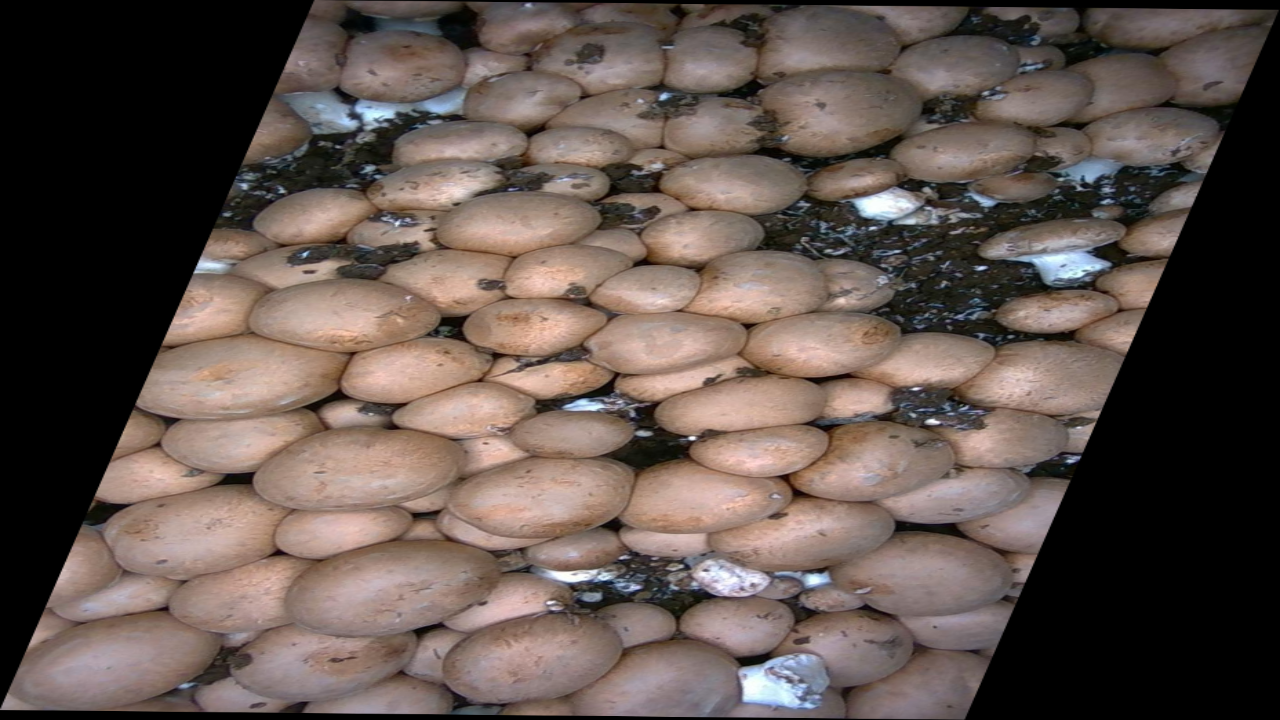

In [3]:
torchvision.transforms.ToPILImage()(label["img_org"])

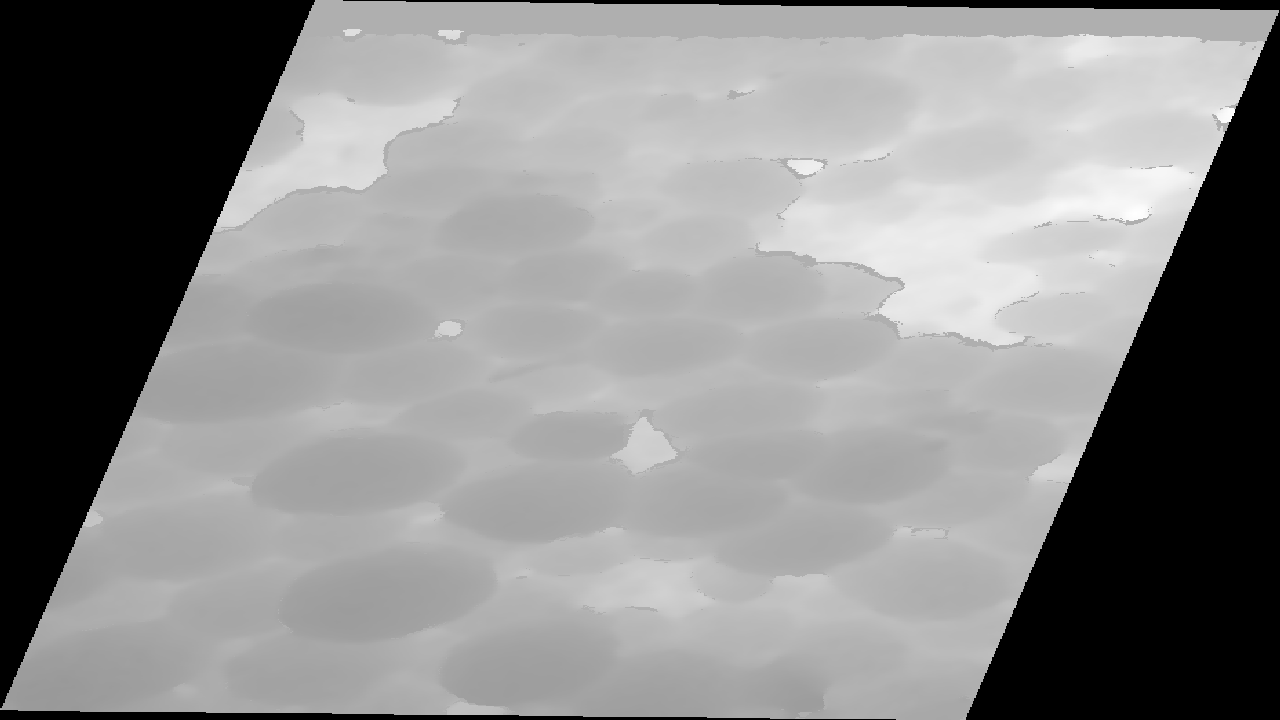

In [4]:
torchvision.transforms.ToPILImage()(label["depth"])

/var/folders/tb/tgj7dr4n5m92qglwy9f4vfm80000gn/T/ipykernel_72699/682917267.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', n_masks)


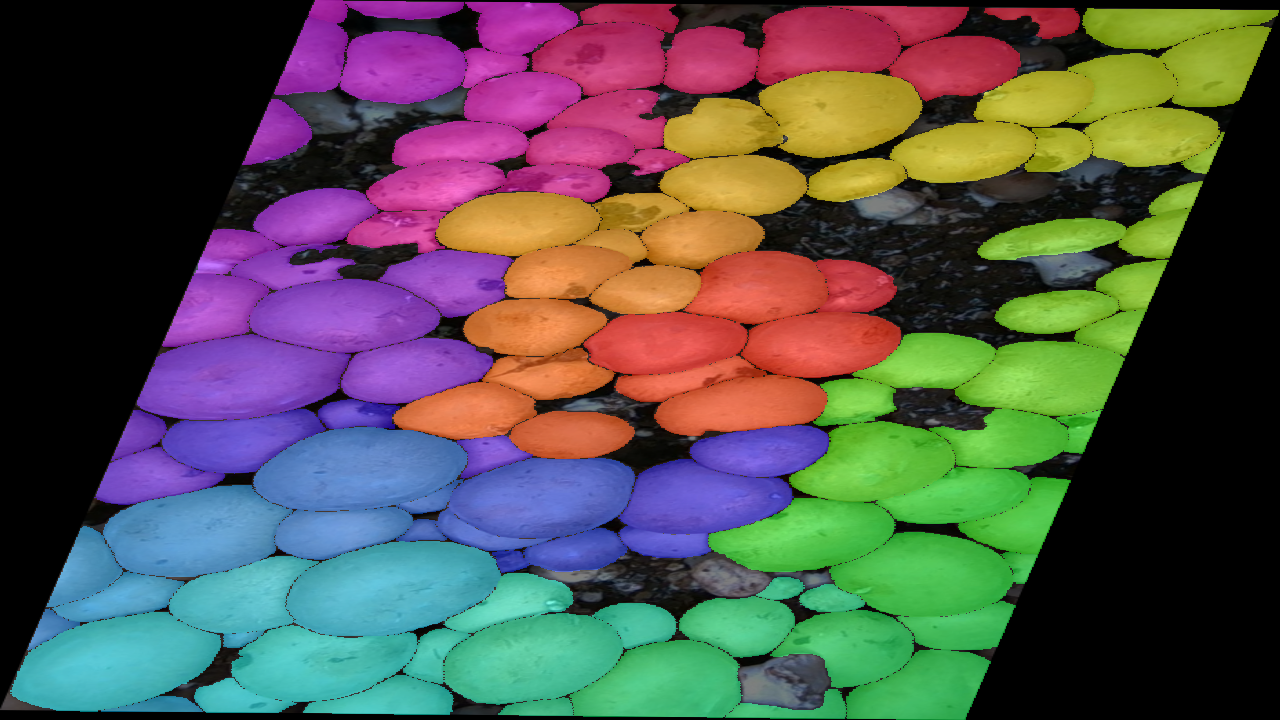

In [5]:
def overlay_masks(image, masks, alpha=0.5):
    """Overlay multiple binary masks on an image."""
    # Create a color map - each mask will have a unique color
    n_masks = len(masks)
    colors = plt.cm.get_cmap('hsv', n_masks)
    # Create a colored image to overlay
    colored_overlay = np.zeros_like(image)

    for i, mask in enumerate(masks):
        color = (np.array(colors(i)[:3]) * 255).astype(np.uint8)  # Get RGB color
        colored_mask = np.zeros_like(image)
        for j in range(3):  # Apply color to the mask
            colored_mask[:, :, j] = color[j]
        colored_overlay[mask == 1] = colored_mask[mask == 1]

    # Overlay the colored image on the original image
    return cv2.addWeighted(image, 1 - alpha, colored_overlay, alpha, 0)

image_org = np.array(torchvision.transforms.ToPILImage()(label["img_org"]))
overlayed = overlay_masks(image_org, label["masks"])
Image.fromarray(overlayed)